# 🏆120-Years Olympics Dataset: Exploratory Analysis 

![](https://media.giphy.com/media/KzBj3pPcpFn8WtluYY/giphy.gif)

### 💡  What is Exploratory Data Analysis?
**Exploratory Data Analysis** refers to the fundamental process of conducting initial assessment on a dataset in order to uncover patterns, spot anomalies, test various machine learning models, and validate assumptions using statistical results and mathematical visualisations.

### 🛣️ EDA Project Roadmap 
Having a comprehensive roadmap helps us to stay on track without getting lost or feeling exhausted as many of these projects can take anywhere between a few days to a few weeks to complete.  
- Select a large real-world dataset 
- Perform data preparation and cleaning using Pandas and Numpy
- Now ask questions related to the topic and try to infer the answers from the dataset. (Note that this is an iterative process and you should keep updating your list as and when a question pops up in your head)
- Perform a data analysis using Matplotlib, Seaborn, Plotly etc.
- Ask a few more questions and try to answer these using questions about your data in the Juptyer notebook
- Summarise your inference and write a conclusion
- Document, publish and present the Jupyter notebook online



## 📊 A Brief Outline Of The Dataset
This is a [comprehensive dataset](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) of the modern-day Olympic Games, spanning and having records of games all the way from 1896, Athens Olympics to 2016, Rio Olympics.
The dataset contains **271116 instances and 15 attributes**. 

Each **instance** corresponds to an **individual athlete** competing in an **individual Olympic event (athlete-events)**. 
While the **attribute** consists of various inputs as follows (to name a few):
- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- Medal- Gold, Silver, Bronze


## 📋 Credits And References
- https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results (Dataset)
- https://medium.com/@gabrielagl99/summer-olympics-eda-medal-count-predictions-7f73e3ed66c6 (Notebook)
- https://rstudio-pubs-static.s3.amazonaws.com/410792_388351278c2f4fa899e1ff00f3bdfb55.html (Notebook)
- https://www.kaggle.com/vardhansiramdasu/summer-olympics-eda/notebook (Notebook)


## 💪🏻 Motivation Behind Choosing This Topic

I have always loved sports and it has been my forte all throughout my childhood. Back when in was school I went on to represent my school in the many inter-school, district and other sports meets. Presently as I am making my transition from mechanical engineering to data science under the guidance of the Jovian team. When I was given this opportunity to choose my own dataset for the EDA Project. Well, guess what I did not think twice before choosing the "Olympics Dataset". With this project I intend to analyse the patterns and gather insights amongst the numerous features and attributes in our dataset. 

## 📥 Downloading The Data And Importing Libraries

In [3]:
!pip install jovian --upgrade --quiet
import jovian
jovian.commit(project= "MY EDA PROJECT")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...


[jovian] Error: Looks like the notebook is missing output cells, please save the notebook and try jovian.commit again.


Committed successfully! https://jovian.ai/vigilantstars6/eda-120-years-olympics-dataset


'https://jovian.ai/vigilantstars6/eda-120-years-olympics-dataset'

In [4]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od
download_url ="https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results"
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vishnuarun22
Your Kaggle Key: ··········


100%|██████████| 5.43M/5.43M [00:00<00:00, 141MB/s]

In [5]:
athlete_data_filename="./120-years-of-olympic-history-athletes-and-results/athlete_events.csv"


In [6]:
regions_data_filename="./120-years-of-olympic-history-athletes-and-results/noc_regions.csv"

In [7]:
!pip install plotly --quiet --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import ListedColormap


     |████████████████████████████████| 15.2 MB 5.4 MB/s 


## 🎨Setting The Style And Color Palette

THEME


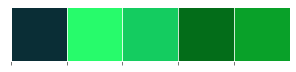

In [8]:
#Lets set the style of all our seaborn based plots
plt.style.use(['ggplot'])
# Setting the theme of our plots
theme = ["#0a2e36", "#27FB6B","#14cc60","#036d19","#09a129"]
print('THEME')
sns.palplot(sns.color_palette(theme))
palette= sns.set_palette(sns.color_palette(theme))

## ✔️ Data Preparation and Cleaning
![Data Cleaning](https://papercut.wpengine.com/wp-content/uploads/2020/01/removing-users-from-PaperCut.gif)
1. Load the file using pandas
2. Look for some of the information about the data and the columns
3. Fix any of the missing or incorrect values

In [9]:
df_1 = pd.read_csv(athlete_data_filename)

In [10]:
df_1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [11]:
df_2= pd.read_csv(regions_data_filename)
df_2

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


#### The focus of this EDA project will solely be on the "Summer Olympics", Let us filter of all the "Winter Olympics Games" from our dataset and perform some basic analysis on dataset `df_1`

In [12]:
df_1= df_1[df_1["Season"]=="Summer"]
df_1.head(51).style.background_gradient(cmap='Greens',axis=None)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.000000,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,nan
1,2,A Lamusi,M,23.000000,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan
2,3,Gunnar Nielsen Aaby,M,24.000000,nan,nan,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,nan
3,4,Edgar Lindenau Aabye,M,34.000000,nan,nan,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.000000,168.000000,nan,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,nan
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.000000,168.000000,nan,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,nan
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.000000,nan,nan,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,nan
31,12,Jyri Tapani Aalto,M,31.000000,172.000000,70.000000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,nan
32,13,Minna Maarit Aalto,F,30.000000,159.000000,55.500000,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,nan
33,13,Minna Maarit Aalto,F,34.000000,159.000000,55.500000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,nan


- Now Let us check all the column names in the dataset `df_1`, so that we get an idea of the values stored in the dataset.

In [13]:
df_1.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

- Okay, that gave us a good idea of the content of the dataset! Now let us count the number of columns in the dataset using Python's the `len()` function.

In [14]:
len(df_1.columns)

15

- Cool, now let us also verify the number of rows the the dataset holds: 

In [15]:
len(df_1)

222552

- Now let us use `.info()` method to summarise the datatypes of all the 15 columns in our dataset.

In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222552 entries, 0 to 271110
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      222552 non-null  int64  
 1   Name    222552 non-null  object 
 2   Sex     222552 non-null  object 
 3   Age     213363 non-null  float64
 4   Height  170695 non-null  float64
 5   Weight  168698 non-null  float64
 6   Team    222552 non-null  object 
 7   NOC     222552 non-null  object 
 8   Games   222552 non-null  object 
 9   Year    222552 non-null  int64  
 10  Season  222552 non-null  object 
 11  City    222552 non-null  object 
 12  Sport   222552 non-null  object 
 13  Event   222552 non-null  object 
 14  Medal   34088 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 27.2+ MB


- Clearly, there are  **3** predominant **data type** in our dataset:
1.  **float64** (Decimal Numbers)
2.  **int64** (Integer Numbers)
3. **Object** (This is basically a Strings, I guess)


- Now, we will use the `.describe() ` method to calculate some of the basic statistical values like percentile, mean and std of the Dataset.
- Note that we have to use this step to find , flag and resolve any sort of anomaly in our dataset. 


In [17]:
df_1.describe().style.background_gradient(cmap='Greens',axis=None)

,ID,Age,Height,Weight,Year
count,222552.000000,213363.000000,170695.000000,168698.000000,222552.000000
mean,67998.925712,25.674053,175.515551,70.689060,1976.317094
std,39139.038228,6.699839,10.914725,14.803940,30.942802
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34000.750000,21.000000,168.000000,60.000000,1956.000000
50%,68302.500000,24.000000,175.000000,70.000000,1984.000000
75%,101881.000000,28.000000,183.000000,79.000000,2000.000000
max,135568.000000,97.000000,226.000000,214.000000,2016.000000


Here's something that caught my eye from the above statistical values: 
- In the `Age` column, the minimum value is `10`, meaning that a kid as young as 10 years has participated in the one of the biggest sporting events on the planet.
- This is kind-of doesn't sound right for a multitude of reasons.
- Okay, I just verified this fact. Yes, so the youngest documented Olympian is 10-year-old Greek gymnast who goes by the name Dimitrios Loundras. He had participated in the 1896 Greek Olympics and managed to bag a Bronze Medal too!

#### Okay, now let us use the latter described methods and analyse dataset `df_2`

In [18]:
df_2.columns

Index(['NOC', 'region', 'notes'], dtype='object')

In [19]:
len(df_2.columns)

3

In [20]:
len(df_2)

230

In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [22]:
df_2.describe().style.set_properties(**{'background-color': '#DEF5E5',
                                    'color': 'black',
                                    'border': '0.5px  solid black'})

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


## 🔀 Merging The Two Datasets Into One

For the uninitiated, let me try and explain the steps that we'll use to merge the two datasets.
1. We first call the method `pandas.merge()`
2. We then passed in the arguments into this method `pd.merge(df_1, df_2,on='NOC', how='left')`. 
3. What this means is that; Since both the datasets(`df_1` & `df_2`) have a common column(`NOC`), we superimpose the two columns and the `how='left'` ensures that the remaining columns of dataset`df_2` get added to the left-side of dataset `df_1` 

In [23]:
data_df= pd.merge(df_1, df_2, how='left',on='NOC')

In [24]:
data_df.head(60).style.background_gradient(cmap='Greens',axis=0)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.000000,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,nan,China,nan
1,2,A Lamusi,M,23.000000,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan,China,nan
2,3,Gunnar Nielsen Aaby,M,24.000000,nan,nan,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,nan,Denmark,nan
3,4,Edgar Lindenau Aabye,M,34.000000,nan,nan,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,nan
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.000000,168.000000,nan,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,nan,Netherlands,nan
5,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.000000,168.000000,nan,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,nan,Netherlands,nan
6,10,"Einar Ferdinand ""Einari"" Aalto",M,26.000000,nan,nan,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,nan,Finland,nan
7,12,Jyri Tapani Aalto,M,31.000000,172.000000,70.000000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,nan,Finland,nan
8,13,Minna Maarit Aalto,F,30.000000,159.000000,55.500000,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,nan,Finland,nan
9,13,Minna Maarit Aalto,F,34.000000,159.000000,55.500000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,nan,Finland,nan


## ⚠️ Finding and Replacing The Null Values In Our Dataset

Okay, now let us find all the missing values in the dataset using the `isna()` method:
- Note you can also use the `isnull()`in place of `isna()`

In [25]:
data_df.isna()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
222548,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
222549,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
222550,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True


So `.isna()`  has retured a dataframe having bool values. Neverthless, since our dataset is quite large this output is difficult to interpret and make sense of. So, let us try and make a few visualisations that will give us a clearer picture of the extent of missing values present in our dataset.

Ok, before plotting the visualisations there is one more thing that we can do:
- Lets add up all the null values using the `.sum()` method

In [26]:
data_df.isnull().sum()


ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

Yes, this is a lot better!
- So the missing values can be summarised as follows:
1. **Age:         9474**
2. **Height:     60171**
3. **Weight:     62875**
4. **Medal:     231333**
5. **Region       370**
6. **Notes     218151**
- Well I believe that the medals tally has a lot of `NAN` values due to the fact that there can be only three winners per sport. However, over hundreds of participants take part and compete for these three spots.

Now, let us make some insightful visualisations and checkout the percentage of the data that is actually missing in the dataset. 

In [27]:
missing_percentage= 100*(data_df.isna().sum().sort_values(ascending=False)/len(data_df))
missing_percentage[missing_percentage!=0]
# So the .sort_values(ascending=False) sorts the values in descending order
# Then the missing_percentage[missing_percentage!=0] pulls out all the values that are not equal to zero and stores it in a list
#  This ensures that the abovee code prints out only the non zero values. In other words it only prints the instances where the data is actually missing!
    

notes     98.022485
Medal     84.683130
Weight    24.198390
Height    23.301071
Age        4.128923
region     0.166253
dtype: float64

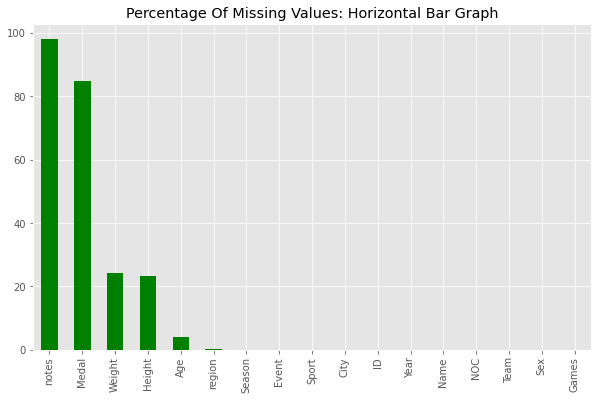

In [28]:
plt.title("Percentage Of Missing Values: Horizontal Bar Graph")
missing_percentage.plot(figsize=(10,6),kind="bar",grid=True,cmap='ocean');

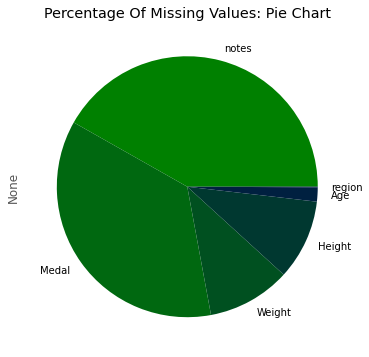

In [29]:
plt.title("Percentage Of Missing Values: Pie Chart")
missing_percentage.plot(figsize=(12,6),kind="pie",cmap="ocean");

The notes column in this dataframe is not of much use to our EDA project so let us just remove it :


In [30]:
data_df.drop(["notes"],axis=1,inplace=True)

Now let us fill all the null values in columns `Age`, `Height` and `Weight` with the mean column parameters: 

In [31]:
data_df['Age'].fillna(value=data_df['Age'].mean(),inplace=True)

In [32]:
data_df['Height'].fillna(value=data_df['Height'].mean(),inplace=True)

In [33]:
data_df['Weight'].fillna(value=data_df['Weight'].mean(),inplace=True)

In [34]:
data_df["region"].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

Okay, I guess I understood what `regions` actually stands for. Let us replace all the Null values in the `region` dataframe with a string that reads; `"Region Unknown"`.

In [35]:
data_df['region'].fillna(value="Region Unknown",inplace=True)

Since only the winners of their respective events will have either a `Gold`, a `Silver` or a `Bronze` medal against their names, Let us fill all the `Null Values` in the dataframe with a string that reads `"Medal Not Won"`. 

In [36]:
data_df['Medal'].fillna(value="Medal Not Won",inplace=True)

In [37]:
data_df.head(11).style.background_gradient(cmap='Greens',axis=0)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.000000,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Medal Not Won,China
1,2,A Lamusi,M,23.000000,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Medal Not Won,China
2,3,Gunnar Nielsen Aaby,M,24.000000,175.515551,70.689060,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Medal Not Won,Denmark
3,4,Edgar Lindenau Aabye,M,34.000000,175.515551,70.689060,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.000000,168.000000,70.689060,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,Medal Not Won,Netherlands
5,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.000000,168.000000,70.689060,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,Medal Not Won,Netherlands
6,10,"Einar Ferdinand ""Einari"" Aalto",M,26.000000,175.515551,70.689060,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,Medal Not Won,Finland
7,12,Jyri Tapani Aalto,M,31.000000,172.000000,70.000000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,Medal Not Won,Finland
8,13,Minna Maarit Aalto,F,30.000000,159.000000,55.500000,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,Medal Not Won,Finland
9,13,Minna Maarit Aalto,F,34.000000,159.000000,55.500000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,Medal Not Won,Finland


In [38]:
data_df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

Okay,seems to have done the job!
Let Us leave the `Null Values` in the region column as it is. We will look at it later on.

Now let us check if our dataset has any duplicate values (The entire row has the same values) using the `duplicated()` method. 

In [39]:
data_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
222547    False
222548    False
222549    False
222550    False
222551    False
Length: 222552, dtype: bool

In [40]:
data_df.duplicated().sum()

1385

Let's drop these duplicate values using the `.drop_duplicates()` method. The argument`keep = 'First'`will ensure that pandas deletes all the duplicate rows, but for the first one!

In [41]:
data_df.drop_duplicates(keep='first',inplace=True,)

Now let us again check the number of duplicate values

In [42]:
data_df.duplicated().sum()

0

Okay, before we head to the `Data Visualisation`section, there yet another anomaly  that requires our attention. 

To showcase this anomaly, let me get all the all-time gold medals won by India in the Olympics 

In [43]:
data_df[(data_df["Team"]=="India") & (data_df["Medal"]=="Gold")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
4186,2699,Shaukat Ali,M,30.000000,175.515551,70.68906,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
4190,2703,Syed Mushtaq Ali,M,22.000000,165.000000,61.00000,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India
4460,2864,Richard James Allen,M,25.000000,172.000000,70.68906,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
4461,2864,Richard James Allen,M,30.000000,172.000000,70.68906,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India
4462,2864,Richard James Allen,M,34.000000,172.000000,70.68906,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.000000,160.000000,62.00000,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India
193964,118553,Carlyle Carrol Tapsell,M,23.000000,182.000000,70.68906,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India
193965,118553,Carlyle Carrol Tapsell,M,27.000000,182.000000,70.68906,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India
205949,125560,"Max ""Maxie"" Vaz",M,25.674053,175.515551,70.68906,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India


In [44]:
len(data_df[(data_df["Team"]=="India") & (data_df["Medal"]=="Gold")])

131

131 gold medals! Now a quick Google search will return the fact that India has not won over 131 Gold medals in the Olympics. 

So is our dataset wrong? Well not exactly, here, instead of tallying the medal of a team event as one medal to the nation,`Pandas` is counting and giving us a summation of all the individials who were a part of the team.

For now let us leave this as it as. This will not have a big impact on our visulisations as very `country` in this dataset will have this advantage!

## ❓ Ask Questions Related To The Dataset

  - Which of the nations have sent most number of athletes to the Summer Olympics? 
  - Has the number of athletes, countries, and events increased or decreased throughout time?
  - Which nations took home the most medals?
  - Participation of male and female athletes over time correlation
  - The correlation between the height and weight of Participants In The Olympics?
  - All The Sports Across Which India Has Won Medals?
  - Sports Have Contributed To Most Medals Over The Years?

## 📈 Exploratory Analysis and Visualisations


### 1. A Word-Cloud That Graphically Shows The  Nations Have Sent Maximum Number Of Athletes Over The Years

In [45]:
!pip install wordcloud --upgrade --quiet

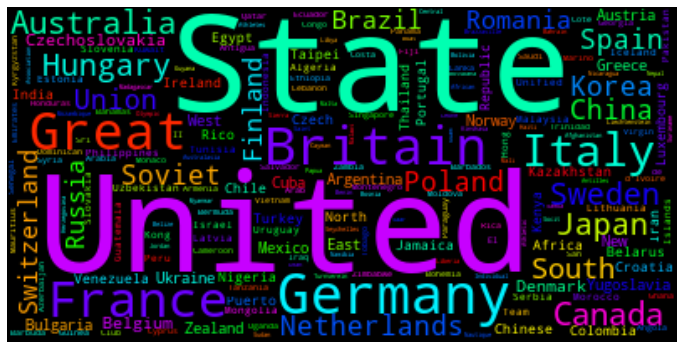

In [46]:
# We will first join all the instances of all the teams into a single string and store it in the variable "countries".
countries = " ".join(n for n in data_df['Team'])
from wordcloud import WordCloud
plt.figure(figsize=(12, 11))
wc = WordCloud(background_color='black',colormap='gist_rainbow',collocations=False).generate(countries)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

That indicates we have more players from United States,Great Britain, France, Germany, Spain, Italy, Japan, Canada, the Netherlands etc among other places.

In [47]:
#Lets verify the above word cloud using this simple code:
count= data_df['Team'].value_counts() 
count.head(20)

United States    14277
Great Britain    10169
France            9850
Italy             8004
Germany           7282
Australia         6975
Canada            6636
Japan             6213
Hungary           6034
Sweden            5773
Netherlands       4993
Spain             4830
Poland            4781
Soviet Union      4584
China             4179
Switzerland       3868
Romania           3722
Brazil            3708
South Korea       3584
Russia            3528
Name: Team, dtype: int64

Yes, this tallies quite exactly with the output shown in the `Word Cloud`. 

### 2. The Relation Between Various Features And Labels In The Olympics Dataset

For checking the various trends between various parameters in our dataset, we will use the pairplot graph. Note that in case of large datasets,it may become difficult to make any solid inferences from the pairplot. Nevertheless, lets give it a try and see what output we get!



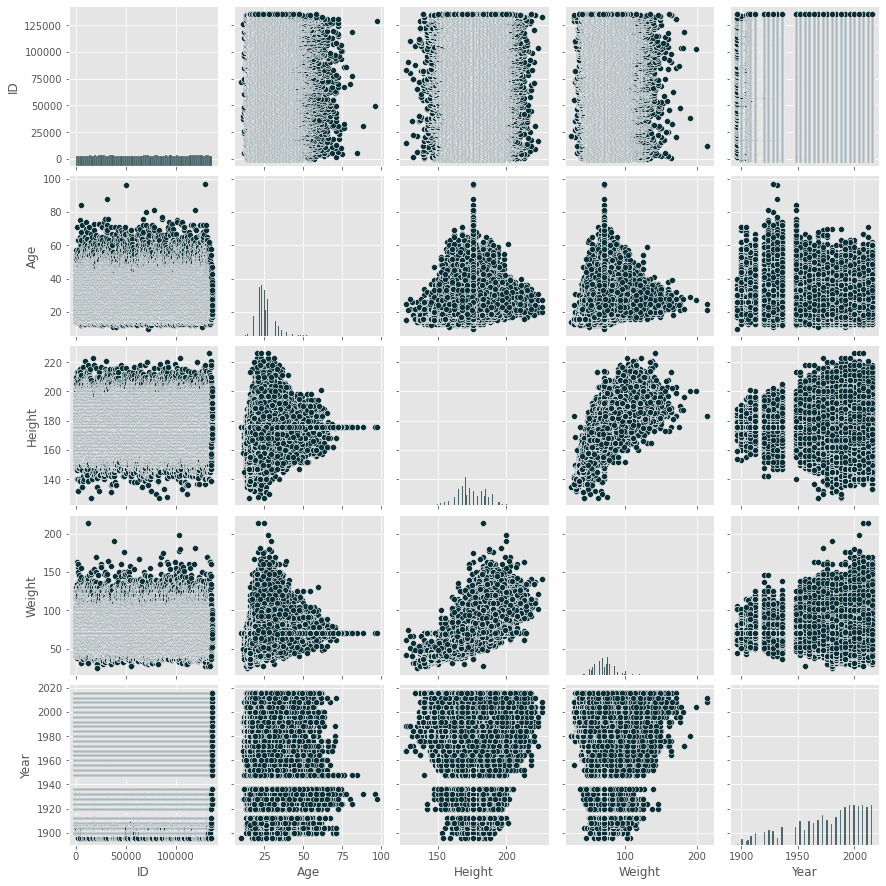

In [48]:
#The pairplot function creates a grid of Axes in which each variable in the data is shared across a single row and a single column on the y-axis.
sns.pairplot(data_df,palette="theme");

**Inference**: Well, we can clearly see a sort of a trend in the relationship between various parameters in our dataset.
- For example: We can see that trend in height and weight has increased over the years. However the age of the participants has been almost uniform (consistant) over the years.
- Now, lets go ahead and explore each one of them!


### 3. The Overall Spread Of The Age Of Athletes In The Summer Olympics

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


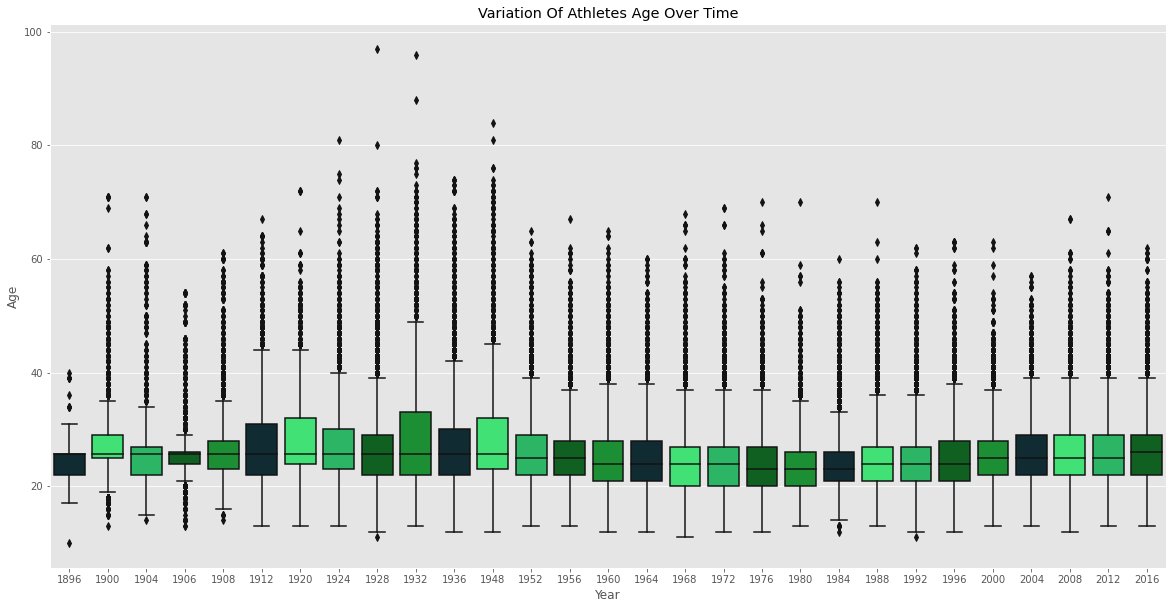

In [49]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=data_df, palette=theme)
plt.title('Variation Of Athletes Age Over Time');

Let's actually plot an interactive boxplot using Plotly.

In [50]:
line_colors=[ "#14cc60","#036d19","#09a129"]
fig = px.box(data_df, x="Year", y="Age",title="<b>The Overall Trend Of Athelete's Age</b>",color_discrete_sequence=line_colors,template = "none")
fig.update_layout(plot_bgcolor = " whitesmoke"
                 )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Inference**: 

**Inference:** We see that the median age of athletes has been  around 25 years for most of the Olympic games over period of 100 years.

### 4. The Overall Trend Of The Summer Olympics Over The Years

In [51]:
trend_df= data_df.groupby('Year').count()['ID'].reset_index()
trend_df.rename(columns={"ID":"Count"},inplace=True)
trend_df.head().style.set_properties(**{'background-color': '#DEF5E5',
                                    'color': 'black',
                                    'border': '0.5px  solid black'})

,Year,Count
0,1896,380
1,1900,1898
2,1904,1301
3,1906,1733
4,1908,3069


In [52]:
line_colors=[ "#14cc60","#036d19","#09a129"]
fig= px.line(trend_df,x='Year',y='Count',title="<b>The Variation In Participants Over The Years</b>",markers=True,color_discrete_sequence=line_colors,template = "none")
fig.update_layout(plot_bgcolor = " whitesmoke")
fig.show()

Now let us make an histogram for the above plot as it will give us a better picture of the same than a line plot. 

In [53]:
line_colors=["#09a129"]
fig=px.histogram(trend_df,x='Year',y='Count',title="<b>The Variation In Participants Over The Years</b>",nbins=70,color_discrete_sequence=line_colors,template = "none")
fig.update_layout(plot_bgcolor = " whitesmoke")
fig.show()

**Inference:** Even though we see that the overall trends has been gradually tending upwards over the years, we can clearly see that there is a sudden drop in the number of participants in the years 1932, 1956 and 1980. We will try to find the reason for this drop and address it in the next sections. 

### 5. The Variation Female Participants Over The Years In The Olympics

In [54]:
female_df= data_df[data_df["Sex"]=="F"]
female_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,70.68906,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,Medal Not Won,Netherlands
5,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,70.68906,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,Medal Not Won,Netherlands
8,13,Minna Maarit Aalto,F,30.0,159.0,55.50000,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,Medal Not Won,Finland
9,13,Minna Maarit Aalto,F,34.0,159.0,55.50000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,Medal Not Won,Finland
33,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,70.68906,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.00000,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia
222541,135560,Stavroula Zygouri,F,36.0,171.0,63.00000,Greece,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",Medal Not Won,Greece
222544,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.00000,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia
222545,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.00000,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver,Russia


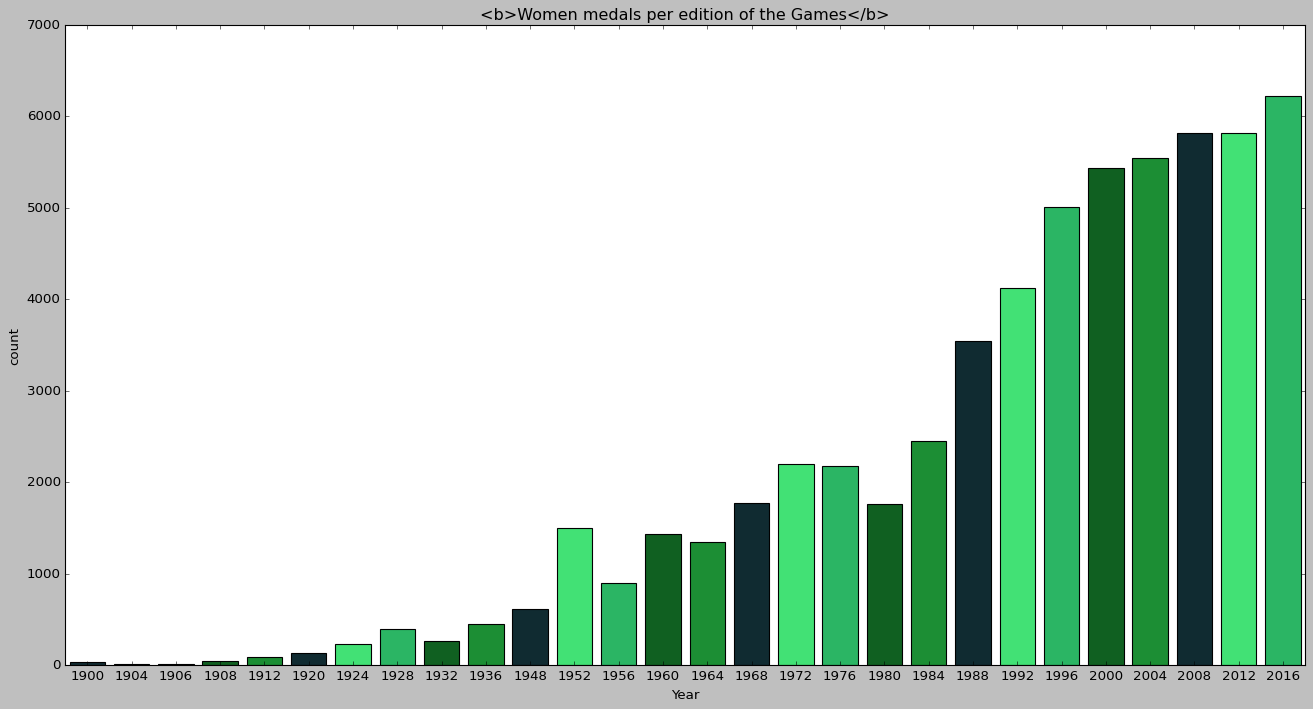

In [55]:
plt.style.use(['classic'])
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=female_df, palette=theme)
plt.title('<b>Women medals per edition of the Games</b>');

**Inference:** We see that the participation of women has been consistently on the rise over the years.

### 6. The Variation Female Participants In Comparsion To Male Participants Over The Years

In [56]:
gender_trend_df=data_df.groupby(['Sex','Year']).count().reset_index()
gender_trend_df.head(21).style.background_gradient(cmap='Greens',axis=0)

,Sex,Year,ID,Name,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,region
0,F,1900,33,33,33,33,33,33,33,33,33,33,33,33,33,33
1,F,1904,16,16,16,16,16,16,16,16,16,16,16,16,16,16
2,F,1906,11,11,11,11,11,11,11,11,11,11,11,11,11,11
3,F,1908,47,47,47,47,47,47,47,47,47,47,47,47,47,47
4,F,1912,87,87,87,87,87,87,87,87,87,87,87,87,87,87
5,F,1920,134,134,134,134,134,134,134,134,134,134,134,134,134,134
6,F,1924,234,234,234,234,234,234,234,234,234,234,234,234,234,234
7,F,1928,391,391,391,391,391,391,391,391,391,391,391,391,391,391
8,F,1932,265,265,265,265,265,265,265,265,265,265,265,265,265,265
9,F,1936,447,447,447,447,447,447,447,447,447,447,447,447,447,447


In [57]:
line_colors = ["#0a2e36",'#27fb6b']
a=px.line(gender_trend_df,x="Year",y="ID",color='Sex',markers=True,color_discrete_sequence=line_colors,template = "none")
a.update_layout(plot_bgcolor = "whitesmoke",
    title="<b>The Male Vs Female Participants Trend Over The Years</b>",
    yaxis_title="Number Of Participants"
)
a.show()

In [58]:
line_colors = ["#0a2e36",'#27fb6b']
fig = px.histogram(gender_trend_df, x="Year",y="ID",color='Sex',nbins=30, opacity=1,color_discrete_sequence=line_colors,template = "none")

fig.update_layout(plot_bgcolor = " whitesmoke",
    title="<b>The Male Vs Female Participants Trend Over The Years</b>",
    yaxis_title="Number Of Participants"
)
fig.show()

**Inference:** Even though the overall trend of both the graphs is on the rise. However, after the 1996 we see that there was a slight dip in the number of male participants. 

In [59]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/vigilantstars6/eda-120-years-olympics-dataset


'https://jovian.ai/vigilantstars6/eda-120-years-olympics-dataset'

### 7. The Relationship Between Height Vs Weight Vs Age of Participants Across Sports

In [60]:
plot = px.scatter(data_df, x="Height", y="Weight",size = "Age", color='Sport',title="<b>Variation Of Height Vs Weight Vs Age Across Sports</b>")
plot.update_layout(plot_bgcolor = "Black",autosize=True)
plot.show()

Output hidden; open in https://colab.research.google.com to view.

**Inference:** On careful observation we can see that `Height` and the `Weight` of the participants follows a trend wherein the the sports of `Weightlifiting` and `Basketball` have higher ratios while other sports such as `Gymnastics` and `Rhythmic Gymnastics` have lower ratios. 
This trend can be explained by the fact that; *both the latter described sports are majorly female dominated.**

In [61]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/vigilantstars6/eda-120-years-olympics-dataset


'https://jovian.ai/vigilantstars6/eda-120-years-olympics-dataset'

### 8. The Top 10 Nations To Win Gold, Silver and Bronze Medals Respectively

In [62]:
medal_df=data_df[data_df['Medal']=="Gold"].groupby(["Team"]).count().sort_values(by='ID', ascending=False).reset_index()
medal_df.head(10).style.background_gradient(cmap='Greens',axis=0)

,Team,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,United States,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333
1,Soviet Union,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830
2,Germany,564,564,564,564,564,564,564,564,564,564,564,564,564,564,564
3,Italy,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492
4,Great Britain,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481
5,Hungary,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432
6,France,421,421,421,421,421,421,421,421,421,421,421,421,421,421,421
7,East Germany,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337
8,Australia,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336
9,Sweden,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326


In [63]:
line_colors = ["#0a2e36", "#27FB6B","#14cc60","#036d19","#09a129"]
gold_plot = px.pie(medal_df.head(10), values='ID',hole=0.6, names='Team', title='<b>Top 10 Gold Winning Nations</b>',color_discrete_sequence=line_colors,template = "none")
fig.update_layout(plot_bgcolor = " whitesmoke")
gold_plot.show()

#### Now Let Us find the Top 10 Silver Medal Earning Nations

In [64]:
silvermedal_df=data_df[data_df['Medal']=="Silver"].groupby(["Team"]).count().sort_values(by='ID', ascending=False).reset_index()
silvermedal_df.head(10).style.background_gradient(cmap='Greens',axis=0)

,Team,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,United States,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241
1,Soviet Union,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635
2,Great Britain,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576
3,Germany,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513
4,France,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485
5,Italy,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467
6,Australia,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450
7,Sweden,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350
8,Hungary,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328
9,China,299,299,299,299,299,299,299,299,299,299,299,299,299,299,299


In [65]:
line_colors = ["#0a2e36", "#27FB6B","#14cc60","#036d19","#09a129"]
silver_plot = px.pie(silvermedal_df.head(10), values='ID',hole=0.6, names='Team', title='<b>Top 10 Silver Winning Nations</b>',color_discrete_sequence=line_colors,template = "none")
silver_plot.show()

#### Now Let Us find the Top 10 Bronze Medal Earning Nations

In [66]:
bronzemedal_df=data_df[data_df['Medal']=="Bronze"].groupby(["Team"]).count().sort_values(by='ID', ascending=False).reset_index()
bronzemedal_df.head(11).style.background_gradient(cmap='Greens',axis=0)

,Team,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,United States,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112
1,Germany,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610
2,Soviet Union,596,596,596,596,596,596,596,596,596,596,596,596,596,596,596
3,Great Britain,541,541,541,541,541,541,541,541,541,541,541,541,541,541,541
4,Australia,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504
5,France,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502
6,Italy,425,425,425,425,425,425,425,425,425,425,425,425,425,425,425
7,Hungary,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363
8,Netherlands,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348
9,Japan,333,333,333,333,333,333,333,333,333,333,333,333,333,333,333


In [67]:
line_colors = ["#0a2e36", "#27FB6B","#14cc60","#036d19","#09a129"]
bronze_plot = px.pie(bronzemedal_df.head(10), values='ID',hole=0.6, names='Team', title='<b>Top 10 Bronze Winning Nations</b>',color_discrete_sequence=line_colors,template = "none")
bronze_plot.show()

**Inference:** 
- We can clearly see that `The United States` is the undisputed leader all the three medal categories.
- The second and third positions have been captured by either `Germany` or `The Soviet Union` without any particular order.


### 9. The Year-Wise Medal Break-up Of The Top Performing Team: The United States

In [68]:
usa_medal_df=data_df[data_df['Team']=="United States"].reset_index()
usa_medal_df.head(11).style.background_gradient(cmap='Greens',axis=0)

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,124,84,Stephen Anthony Abas,M,26.000000,165.000000,55.000000,United States,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,USA
1,207,142,"David ""Dave"" Abbott",M,26.000000,183.000000,75.000000,United States,USA,1928 Summer,1928,Summer,Amsterdam,Athletics,"Athletics Men's 5,000 metres",Medal Not Won,USA
2,213,149,Mara Katherine Abbott,F,30.000000,163.000000,52.000000,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,"Cycling Women's Road Race, Individual",Medal Not Won,USA
3,214,150,Margaret Ives Abbott (-Dunne),F,23.000000,175.515551,70.689060,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA
4,215,151,Mary Perkins Ives Abbott (Perkins-),F,42.000000,175.515551,70.689060,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Medal Not Won,USA
5,217,153,Monica Cecilia Abbott,F,23.000000,191.000000,88.000000,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver,USA
6,242,165,Nia Nicole Abdallah,F,20.000000,175.000000,56.000000,United States,USA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver,USA
7,397,256,"Abdihakim ""Abdi"" Abdirahman",M,23.000000,178.000000,61.000000,United States,USA,2000 Summer,2000,Summer,Sydney,Athletics,"Athletics Men's 10,000 metres",Medal Not Won,USA
8,398,256,"Abdihakim ""Abdi"" Abdirahman",M,27.000000,178.000000,61.000000,United States,USA,2004 Summer,2004,Summer,Athina,Athletics,"Athletics Men's 10,000 metres",Medal Not Won,USA
9,399,256,"Abdihakim ""Abdi"" Abdirahman",M,31.000000,178.000000,61.000000,United States,USA,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Men's 10,000 metres",Medal Not Won,USA


In [69]:
yearly_medals = usa_medal_df.groupby(['Medal', 
'Year']).size().reset_index().pivot(columns='Medal', index='Year', values=0).reset_index()
yearly_medals.head(10).style.set_properties(**{'background-color': '#DEF5E5',
                                    'color': 'black',
                                    'border': '0.5px  solid black'})

Medal,Year,Bronze,Gold,Medal Not Won,Silver
0,1896,2,11,7,7
1,1900,13,18,69,14
2,1904,66,65,624,68
3,1906,6,12,57,6
4,1908,15,34,153,16
5,1912,36,46,257,25
6,1920,38,111,279,45
7,1924,49,91,273,34
8,1928,17,47,294,24
9,1932,61,67,355,42


In [70]:
fig = px.bar(yearly_medals, x =  "Year", barmode = "stack", y=["Bronze", "Gold","Silver"],
            color_discrete_map={'Gold': '#14cc60', 'Silver': '#27FB6B', 'Bronze': '#036d19'})
fig.update_layout(plot_bgcolor = " whitesmoke", title = "<b>Medals-Breakup Over The Years</b>", yaxis_title = "Medal Count")

fig.show() 

**Inference:** 
- The Gold medals tally has always been more than Silver and Bronze medals
- We can see that over the years the United States has gradually increased their share of gold medals 
- This can be explained by increased sports expenditure under the term of President Theodore Roosevelt. The latter dominated the politics in America during the 1900s, and personally held a high regard for physical fitness and athleticism.


### 10. Year-Wise Medal Break-up WRT To Genders In Top Performing Team: The United States

In [71]:
usagender_df= usa_medal_df[(usa_medal_df['Medal']=="Gold")|(usa_medal_df['Medal']=="Silver")|(usa_medal_df['Medal']=="Bronze")].groupby(['Year',"Sex"]).count().sort_values(by="ID",ascending=False).reset_index()

In [72]:
usagender_df.head().style.set_properties(**{'background-color': '#DEF5E5',
                                    'color': 'black',
                                    'border': '0.5px  solid black'})

,Year,Sex,index,ID,Name,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,region
0,1984,M,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212
1,1904,M,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193
2,1920,M,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180
3,2008,F,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158
4,1924,M,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155


In [73]:
fig = px.bar(usagender_df, x="Year", y="Medal", color="Sex", title="<b>Gender BreakUp Of American Medal Winners Over The Years</b>",
              color_discrete_map={'M': '#036d19', 'F': '#27FB6B'})
fig.update_layout(plot_bgcolor = " whitesmoke"

    )
fig.show()

**Inference:** It is clear that in the recent years female atheles have been winning more medals compared to their male counterparts

### 11. A Word-Cloud Visualizing Sports In Which India Has Won Medals Over The Years

In [74]:
indiasports_df= data_df[(data_df['Team']=="India")] 

In [75]:
indiawin_df= indiasports_df[ (indiasports_df['Medal']=="Gold") | (indiasports_df['Medal']=="Silver") | (indiasports_df['Medal']=="Bronze")].sort_values(by="Medal",ascending=False)

In [76]:
indiawin_df.style.background_gradient(cmap='Greens',axis=0)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
162491,99103,Rajyavardhan Singh Rathore,M,34.000000,188.000000,85.000000,India,IND,2004 Summer,2004,Summer,Athina,Shooting,Shooting Men's Double Trap,Silver,India
159207,97066,Norman Gilbert Pritchard (-Trevor),M,24.000000,175.515551,70.689060,India,IND,1900 Summer,1900,Summer,Paris,Athletics,Athletics Men's 200 metres Hurdles,Silver,India
181553,111028,Charanjit Singh,M,29.000000,175.000000,58.000000,India,IND,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Silver,India
181485,110974,"Pusarla Venkata ""P. V."" Sindhu",F,21.000000,179.000000,65.000000,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Women's Singles,Silver,India
181627,111083,Jaswant Singh,M,29.000000,185.000000,77.000000,India,IND,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Silver,India
178818,109296,Jaman Lal Sharma,M,24.000000,169.000000,59.000000,India,IND,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Silver,India
181699,111123,Prithipal Singh,M,28.000000,175.000000,71.000000,India,IND,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Silver,India
174232,106335,Govind Rao Sawant,M,24.000000,171.000000,60.000000,India,IND,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Silver,India
181764,111159,Udham Singh Kular,M,32.000000,168.000000,58.000000,India,IND,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Silver,India
105781,64909,Sushil Kumar Solanki,M,29.000000,166.000000,66.000000,India,IND,2012 Summer,2012,Summer,London,Wrestling,"Wrestling Men's Welterweight, Freestyle",Silver,India


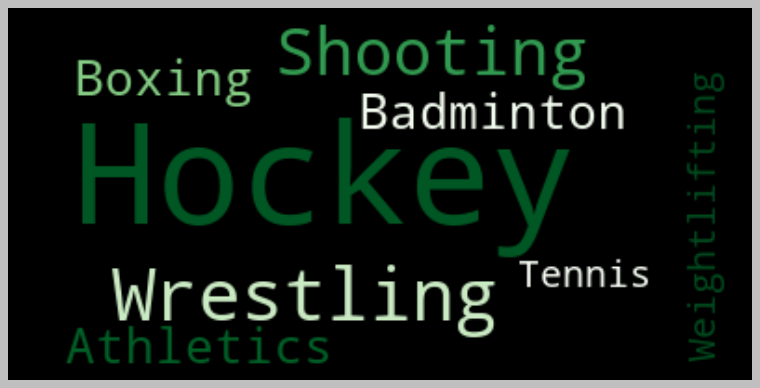

In [77]:
sports = " ".join(n for n in indiawin_df['Sport'])
from wordcloud import WordCloud
plt.figure(figsize=(12, 11))
wc = WordCloud(background_color='black',colormap='Greens',collocations=False).generate(sports)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [78]:
indiawin_df["Sport"].unique()

array(['Shooting', 'Athletics', 'Hockey', 'Badminton', 'Wrestling',
       'Weightlifting', 'Boxing', 'Tennis'], dtype=object)

**Inference:** 
- India seems to have won medals across countable sports over the years. 
- Hockey accounts for maximum number of medals and this can be validated by the fact that it is the national sport of India. 

### 12. The Top 3 Male Athlete's By The Number Of Medals Across All Sports 

In [79]:
data_M=data_df[data_df['Sex']=='M']

In [80]:
topmale_df= data_M[(data_M['Medal']=="Gold")|(data_M['Medal']=="Silver")|(data_M['Medal']=="Bronze")].groupby(['Name',"Team","Sport"]).count().sort_values(by="ID",ascending=False).reset_index()
topmale_df.head(5).style.background_gradient(cmap='Greens',axis=0)

,Name,Team,Sport,ID,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Event,Medal,region
0,"Michael Fred Phelps, II",United States,Swimming,28,28,28,28,28,28,28,28,28,28,28,28,28
1,Nikolay Yefimovich Andrianov,Soviet Union,Gymnastics,15,15,15,15,15,15,15,15,15,15,15,15,15
2,Edoardo Mangiarotti,Italy,Fencing,13,13,13,13,13,13,13,13,13,13,13,13,13
3,Borys Anfiyanovych Shakhlin,Soviet Union,Gymnastics,13,13,13,13,13,13,13,13,13,13,13,13,13
4,Takashi Ono,Japan,Gymnastics,13,13,13,13,13,13,13,13,13,13,13,13,13


In [81]:
top_male_data = dict(
    name=["Michael Phelps", "Nikolay Andrianov", "Borys Shakhlin",'Takashi Ono','Edoardo Mangiarotti'],
    country=["USA","Soviet Union","Soviet Union","Japan","Italy"],
    parent=["Swimming", "Gymnastics", "Gymnastics", "Gymnastics", "Fencing"],
    value=[28, 15, 13, 13, 13])

In [82]:
line_colors = ["#0a2e36", "#27FB6B","#14cc60","#036d19","#09a129"]
fig = px.sunburst(top_male_data, path=['parent', 'country','name'], values='value',color_discrete_sequence=line_colors,template = "none")
                 
fig.show()

**Inference:** 
- The top 3 male performers are namely Michael Phelps(USA), Nikolay Andrianov (Soviet Union) and Borys Shakhlin (Soviet Union) respectively. 
- While the latter two athletes belonged to the era of the cold-war, Michael Phillips is an athlete who contested in the recent years post the collapse of the Soviet Union.
- It is quite amazing that these athletes have individuallly  won more medals than many countries like Indonesia, Nepal, India, and most of the African and South American Nations. 

### 13. The Top 3 Female Athlete's By The Number Of Medals Across All Sports 

In [83]:
data_F=data_df[data_df['Sex']=='F']

In [84]:
topfemale_df= data_F[(data_F['Medal']=="Gold")|(data_F['Medal']=="Silver")|(data_F['Medal']=="Bronze")].groupby(['Name',"Team","Sport"]).count().sort_values(by="ID",ascending=False).reset_index()

In [85]:
topfemale_df.head(5).style.background_gradient(cmap='Greens',axis=0)

,Name,Team,Sport,ID,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Event,Medal,region
0,Larysa Semenivna Latynina (Diriy-),Soviet Union,Gymnastics,18,18,18,18,18,18,18,18,18,18,18,18,18
1,"Dara Grace Torres (-Hoffman, -Minas)",United States,Swimming,12,12,12,12,12,12,12,12,12,12,12,12,12
2,Natalie Anne Coughlin (-Hall),United States,Swimming,12,12,12,12,12,12,12,12,12,12,12,12,12
3,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",United States,Swimming,12,12,12,12,12,12,12,12,12,12,12,12,12
4,Vra slavsk (-Odloilov),Czechoslovakia,Gymnastics,11,11,11,11,11,11,11,11,11,11,11,11,11


In [86]:
top_female_data = dict(
    name=["Larysa Semenivna Latynina", "Jennifer Elisabeth Thompson", "Dara Grace Torres",'Natalie Anne','Birgit Fischer'],
    parent=["Gymnastics", "Swimming", "Swimming", "Swimming","Gymnastics"],
    country=["Soviet Union", "United States", "United States", "United States","Czechoslovakia"],
    value=[18, 12, 12, 12, 11])

In [87]:
line_colors = ["#0a2e36", "#27FB6B","#14cc60","#036d19","#09a129"]
fig = px.sunburst(top_female_data, path=['parent', 'country','name'], values='value',title="<b>Top 3 Female Athlete's By The Number Of Medals Across All Sports</b>",color_discrete_sequence=line_colors,template = "none")
fig.update_layout(plot_bgcolor = " whitesmoke")
fig.show()

**Inference:** 
- The top 3 female performers are namely Larissa Semyonovna (Soviet Union),Jennifer Elisabeth Thompson (USA) and Dara Grace Torres (USA) respectively. 
- Similar to their male counterparts, these athletes too have individually  won more medals than most of the developing nations like Indonesia, Nepal, India, and most of the African and South American Nations. 

### 14. Which Different Cities Hosted The Olympic Games Over The Years

In [88]:
!pip install geopandas --quiet
import geopandas as gpd
!pip install folium --quiet
import folium 
import matplotlib.pyplot as plt
import random
import json
!pip install geopy
from geopy.geocoders import Nominatim
!pip install shapely
from shapely.geometry import Point, LineString

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 58.9 MB/s 
     |████████████████████████████████| 6.3 MB 42.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
city= data_df.City.unique()

In [90]:
city_list= city.tolist()
city_list

['Barcelona',
 'London',
 'Antwerpen',
 'Paris',
 'Los Angeles',
 'Helsinki',
 'Sydney',
 'Atlanta',
 'Stockholm',
 'Beijing',
 'Rio de Janeiro',
 'Athina',
 'Mexico City',
 'Munich',
 'Seoul',
 'Berlin',
 'Melbourne',
 'Roma',
 'Amsterdam',
 'Montreal',
 'Moskva',
 'Tokyo',
 'St. Louis']

In [91]:
# function that will return the coordinates of every city from out city_list 
def get_coordinates(city_list):
    """Takes a list of cities and returns a dictionary of the cities and their corresponding coordinates."""
    geolocator = Nominatim(user_agent="location script")
    dictionary = {}
    
    for city in city_list:
        try:
            location = geolocator.geocode(city)
        except:
            raise Exception("There was a problem with the getCoordinates function")
        coordinate_values = (location.longitude, location.latitude)  #in geopandas, the x value corresponds to the longitude while the y value, the latitude(Just in case you were wondering why it was *location.longitude, location.latitude* and not the other way round )
        dictionary[city] = coordinate_values #adding the coordinate pair to the dictionary at the end of every loop
    return dictionary #finally returns the dictionary 

In [ ]:
city_coords_dict = get_coordinates(city_list)
city_coords_dict

In [ ]:
coordinates_df = pd.DataFrame(city_coords_dict)
coordinates_df.style.set_properties(**{'background-color': '#DEF5E5',
                                    'color': 'black',
                                    'border': '0.5px  solid black'})

In [ ]:
# Transposing the above dataframe do that we have a vertical tabular column
coordinates1_df= coordinates_df.T
df=coordinates1_df.reset_index()
df.columns

In [ ]:
#Renaming The Columns
df.rename({"index":"City", 0: 'lon', 1: 'lat'},axis=1, inplace=True) 
df.columns

In [ ]:
df.style.set_properties(**{'background-color': '#DEF5E5',
                                    'color': 'black',
                                    'border': '0.5px  solid black'})

In [ ]:
# Rearranging the columns 
df_1 = df[["lat","lon","City"]]
df.style.set_properties(**{'background-color': '#DEF5E5',
                                    'color': 'black',
                                    'border': '0.5px  solid black'})

In [ ]:
city_map= folium.Map(location=[41.382894, 2.177432], zoom_start=2.1, tiles="Stamen Terrain",control_scale=True)
folium.Marker([df_1.iloc[0,0],df_1.iloc[0,1]],
              popup= df["City"]).add_to(city_map)

In [ ]:
for i in range(1,len(df_1)):
    location=[df_1.iloc[i,0], df_1.iloc[i,1]]
    folium.Marker(location, popup= df_1.iloc[i,2]).add_to(city_map)

In [ ]:
city_map

### 15. A Visualization Showing Sports That Have Most Number Of Events

In [ ]:
line_colors = ["#0a2e36", "#27FB6B","#14cc60","#036d19","#09a129"]
fig = px.treemap(data_df,title="<b>The Trend Of Number Of Events Under Each Sport</b>", path=[px.Constant("All Sports"), 'Sport', 'Sex', 'Medal'],color_discrete_sequence=line_colors,template = "none")
fig.update_traces(root_color="Black")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### 16. A Choropleth Map Showing The Distribution Of Medals Among Countries

In [ ]:
import pandas as pd
import folium 
from folium.plugins import StripePattern
import geopandas as gpd
import numpy as np

In [ ]:
arr= data_df["Team"].unique()

In [ ]:
lis = arr.tolist()

In [ ]:
lis

In [ ]:
arr= data_df["region"].unique()
lis = arr.tolist()
lis

In [ ]:
data_df

## 🎓 Inferences & Conclusions

 Here's a summary of a few of them:

- **Plot-1**: Based on the "Word-Cloud" that we obtained, it is clear that over the years, maximum number of athletes have represented first-world countries like the United States, the United Kingdom, France, Germany, Spain, Italy, Japan, Canada, and the Netherlands etc. This can be explained by their lavish investments in athletes and sports infrastructure. 


- **Plot-2**: The "Pair-Plot" is used to examine the trends between the key variables in our dataset. One of the inferences is that; over the years the parameters of "Height" and "Weight" has been increasing in the positive direction. However, the parameter "Age" has been almost  constant over the years.


- **Plot-3**: From the "Box-Plot" it is clear that the median age of athletes almost every year over a 120 year period is around 25 years. This trend can be scientifically backed by the fact that most human-beings are in their athletic prime between the ages of 20 to 30 after which they start undergoing irreversible changes in their body. 


- **Plot-4**: The overall trends of the number of participants taking part in the Olympics has gradually tended upwards. However, at 3 instances(1932,1956 & 1980), there is a sudden drop in the number of participants. This can be explained in two parts:
   - The 1932 Olympics was held amidst the Great Depression due to which very few nations sent their athletes to take part in the event. 
   - The Olympics of 1956 & 1980 had limited participation due to the complete boycott caused by different groups of nations over different issues.


- **Plot-5**: The participation of women athletes in the Olympics has seen a positive trajectory from 1908. In 1952, the number of women participants almost doubled in comparsion to the previous edition of the Olympics.


- **Plot-6**: Despite the number of male and female participants being on a rise since the first edition of the game held in 1896, the numbers are skewed towards the male athletes. Without dismissing the element of gender-bias, it can be partly explained by the fact that; historically most sports have evolved around men. 


- **Plot-7**: The Height & Weight of the participants follows a distinct trend with respect to their sport.  Sports like Weightlifting and Basketball have higher ratios while other sports such as Gymnastics and Rhythmic Gymnastics have lower ratios. This trend can be explained by the fact that; both the latter described sports are majorly female dominated with  almost negligible participation from male athletes. Furthermore, the age of gymnasts is much less in comparion to athletes of sports like basketball & Volleyball.


- **Plot-8.0**: The top 3 nations to win the most number of Gold medals are: 
    - 1. USA
    - 2. Soviet Union
    - 3. Russia
- **Plot-8.1**: The top 3 nations to win the most number of Silver medals are: 
    - 1. USA
    - 2. Soviet Union
    - 3. The Great Britain
- **Plot-8.2**: The top 3 nations to win the most number of Bronze medals are:
    - 1. USA
    - 2. Germany
    - 3. Soviet Union


- **Plot-9**: American athletes brought home the most number of medals per person. From the visualization, it evident that the Americans love Gold medals more in comparison to Silver and Bronze.  
  - Under the leadership of President Theodore Roosevelt beginning in 1900's, increased sports expenditure saw a gradual rise in their medal tally with exception to the 1906 (The 1906 Olympics was intercalated due to which the medal tally from this edition was not officially recognised) 


- **Plot-10**: From this plot it can be realised that in the recent years, female American athletes have consistently bagged more medals than their male counter parts. 


- **Plot-11**: India has concentrated most of their medals in sports like Hockey, Wrestling and, Shooting to name a few. This is because hockey is their national sport due to wish it received huge importance in the past. Apart from this,  wrestling and archery have always been an important part of various regional traditions.  


- **Plot-12**:  The Top 3 male athletes by the number of medals they've won are:
    - 1. Michael Fred Phelps 
    - 2. Nikolay Andrianov
    - 3. Borys Shakhlin


- **Plot-13**:  The Top 3 female athletes by the number of medals they've won are:
    - 1. Larysa Latynina
    - 2. Jennifer Thompson
    - 3. Dara Torres    


- **Plot-14**: This visualization has plotted all the cities that have hosted the Olympic games. Here, it is evident that almost edition has been hosted by a first world country except for three instances i.e (Moscow:1980, Beijing:2008, Rio De Janeiro:2016) 


- **Plot-15**: From the tree-map, it is evident athletics and gymnastics followed by swimming have most number of corresponding events under them. Since these sports are centuries old and did not require any other sports accessories, they evolved to have a diverse set of events as a subset to  original sport.


In [ ]:
jovian.commit()

## 🔮 Future Work

- Lets make a Coropleth Map mark the countries and explain as to why there is a sudden exponential drop in the number of participants at three instances in the historical timeline of the olympics 
- Does Wealth (GDP) have any effect on a countries performance in the olympics?
  Well, guess what , I've found a  [GDP dataset](https://github.com/bhushanrane29/Summer-Olympics-EDA/blob/master/gdp_data.csv) on Github that I can merge with the above dataset and perform further analysis
- What is the relation between a countries climate and their olympic medal tally?
- Does home advantage give countries an edge in their medals tally? (Linearcurve I guess)
- Does an athele's height have any role to play in winning an olympic medal? (Heatmap) 
- I can add the Paralympics[link](https://www.kaggle.com/shivagovindasamy/2020-tokyo-paralympics) data too
- Replace the pie charts with sunburst charts at places where it is possible


## 📜 Summary 

Yes, using numerous data analysis and visualisation techniques we have analysed our dataset and come up with inferences. There is still room for improvement and advanced visulisations that with which even more minute insights can be pulled out of our dataset. I will continue working and updating this note book as and when I find some time. Yes thanks for spending your valuable time on reading this notebook!